# 🐷 Susie Basic Timing and Ephemeris Object Usage

🔵 Import the necessary python libraries and Susie objects.

In [1]:
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## &#128309; Basic Usage

The basic creation and usage of the **TimingData** and **Ephemeris** objects. This will assume the following:

1. Your data is in JD TDB timing format and system
2. You have both transit and occultation data
3. You have mid time uncertainties included in your data

We will pull this data from the repository below.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 1:** Download the example timing data <small>(includes transit and occultation data in Barycentric Julian Date)</small> from the GitHub repository

In [2]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/refs/heads/main/example_data/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["mid_time"])
mid_time_errs = np.array(data["mid_time_err"])

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 2:** Add your transit and occultation data to the TimingData object.

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData("jd", epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale="tdb")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 3:** Create the Ephemeris object and add your TimingData object.

In [4]:
ephemeris_obj1 = Ephemeris(timing_obj1)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 4:** Fit your transit time data to an ephemeris. You can specify what type of ephemeris with the options "linear", "quadratic", or "precession".

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The **Linear** Ephemeris

In [5]:
# Getting a linear ephemeris will solve for period, conjuction time, and their respective errors
linear_ephemeris = ephemeris_obj1.fit_ephemeris("linear")

c:\Users\bigna\Desktop\VIP_nathan_2025\venv\Lib\site-packages\susie\ephemeris.py:99: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


**🟢  EXAMPLE**

Calling `fit_ephemeris` will return a dictionary of data. Below is an example of the dictionary returned for `linear_model_data`:

```
{'period': 1.0914196400440928,
 'period_err': 4.21033087274383e-08,
 'conjunction_time': 0.0023543850341696416,
 'conjunction_time_err': 9.256430832207615e-05,
 'ephemeris_type': 'linear',
 'ephemeris_data': array([2.35438503e-03, 2.53757421e+02, 2.58123099e+02...])}

```

In [6]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in linear_ephemeris.items():
#     print(f"{key}: {value}\n")

🔹 We can also **plot** the ephemeris calculated data. Here, the data will look very similar to our actual, observed data.

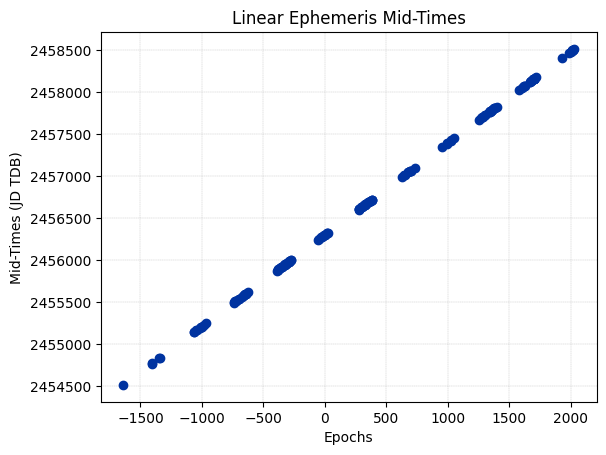

In [7]:
ephemeris_obj1.plot_ephemeris(linear_ephemeris)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The **Quadratic** Ephemeris

We can do the same process for a quadratic ephemeris by specifying 'quadratic' for the ephemeris type instead of linear. The same process above is shown below for the quadratic ephemeris.

In [8]:
# Getting a quadratic ephemeris will solve for period, conjuction time, orbital decay rate (change in period over epochs), and their respective errors
quadratic_ephemeris = ephemeris_obj1.fit_ephemeris('quadratic')

c:\Users\bigna\Desktop\VIP_nathan_2025\venv\Lib\site-packages\susie\ephemeris.py:233: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


**🟢  EXAMPLE**

Below is an example of the dictionary returned for `quadratic_ephemeris`:

```
{'period': 1.0914217244026556,
'period_err': 1.543206321797526e-07,
'conjunction_time': 0.0005511865218625013,
'conjunction_time_err': 0.00014528672879359023,
'period_change_by_epoch': -9.902087992310958e-10,
'period_change_by_epoch_err': 7.206633676288036e-11,
'ephemeris_type': 'quadratic',
'ephemeris_data': array([5.51186522e-04, 2.53756075e+02, 2.58121761e+02, 3.20878495e+02...])}
```

In [9]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in quadratic_ephemeris.items():
#     print(f"{key}: {value}\n")

🔹 Let's **plot** the quadratic ephemeris calculated data. However, to see the quadratic effect in the data (which is very small compared to the linear term values) let's use the `subtract_lin_params` argument in the method below with the value `True`. This will subtract the linear terms from the data so we can see the pattern of the smaller quadratic terms. 

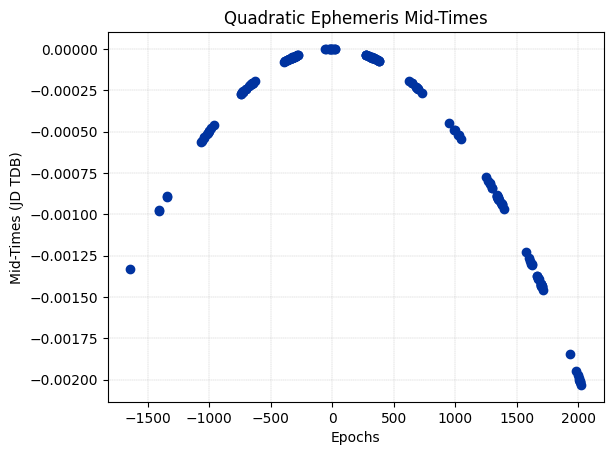

In [10]:
ephemeris_obj1.plot_ephemeris(quadratic_ephemeris, subtract_lin_params=True)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The **Precession** Ephemeris

<p style="color:#FFCC00;">WARNING: This is still a work in progress.</p>

We can do the same process for a precession ephemeris by specifying 'precession' for the ephemeris type. The same process above is shown below for the precession ephemeris.

In [11]:
# Getting a precession model will solve for period, conjuction time, eccentricity, argument of pericenter, precession rate (change in pericenter over epochs), and all respective errors
precession_ephemeris = ephemeris_obj1.fit_ephemeris('precession')

c:\Users\bigna\Desktop\VIP_nathan_2025\venv\Lib\site-packages\susie\ephemeris.py:368: RuntimeWarning: divide by zero encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


**🟢  EXAMPLE**

Below is an example of the dictionary returned for `precession_ephemeris`:

```
{ 
  period: 1.0914197028967376
  period_err: 1.153266507777357e-07
  conjunction_time: 2456305.4551834567
  conjunction_time_err: 8.594867897673676e-05
  eccentricity: 0.0011126223574276506
  eccentricity_err: 0.000244930760422585
  pericenter: 3.0305775444476373
  pericenter_err: 0.0997763818517451
  pericenter_change_by_epoch: 0.0013029813801310435
  pericenter_change_by_epoch_err: 0.0001249448032116432
  ephemeris_type: precession
  ephemeris_data: [2454515.52662848 2454769.28220636 2454773.6478833  2454836.40415131]
}
```

In [12]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in precession_ephemeris.items():
#     print(f"{key}: {value}\n")

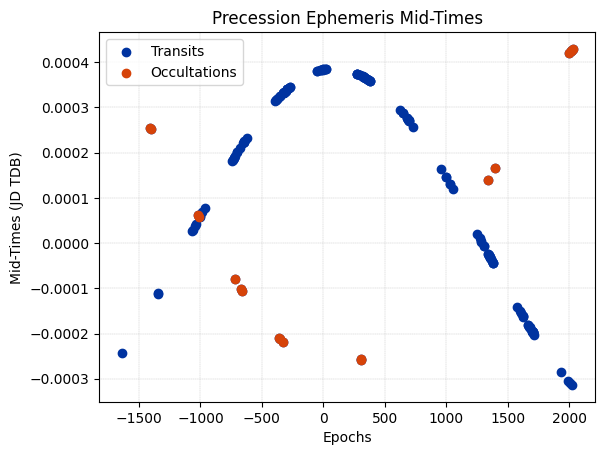

In [13]:
ephemeris_obj1.plot_ephemeris(precession_ephemeris, subtract_lin_params=True, show_occultations=True)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 5:** Get BIC Values

We can get the BIC value for a specific ephemeris fit using the ephemeris data dictionaries returned from the `fit_ephemeris` method.

In [14]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_ephemeris)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_ephemeris)
precession_bic_value = ephemeris_obj1.calc_bic(precession_ephemeris)

print(f"Linear Ephemeris BIC: {linear_bic_value}\nQuadratic Ephemeris BIC: {quadratic_bic_value}\nPrecession Ephemeris BIC: {precession_bic_value}")

Linear Ephemeris BIC: 386.7189797398746
Quadratic Ephemeris BIC: 184.99005924763887
Precession Ephemeris BIC: 322.1803552647068


And we can also get a $\Delta$ BIC value using the method `calc_delta_bic`. We do not need to input any data for this method. It will create the specified ephemerides for you and calculate the BIC values for each ephemeris, then calculate the $\Delta$ BIC value. 

Keep in mind, it <span style="color: #4BA5DD;">**ONLY returns the $\Delta$ BIC value**</span> and not the other data calculated.

In [15]:
lq_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "quadratic")
lp_delta_bic_value = ephemeris_obj1.calc_delta_bic("linear", "precession")
qp_delta_bic_value = ephemeris_obj1.calc_delta_bic("quadratic", "precession")

print(f"Linear vs. Quadratic \u0394 BIC: {lq_delta_bic_value}\nLinear vs. Precession \u0394 BIC: {lp_delta_bic_value}\nQuadratic vs. Precession \u0394 BIC: {qp_delta_bic_value}")

Linear vs. Quadratic Δ BIC: 201.72892049223574
Linear vs. Precession Δ BIC: 64.53862447516781
Quadratic vs. Precession Δ BIC: -137.19029601706794


<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 6:** Plot your data!

Now you can use the linear_ephemeris and quadratic_ephemeris dictionaries for plotting methods. Available plotting methods include:

* `plot_ephemeris`: This will plot the ephemeris predicted mid-times. This takes in a ephemeris data dictionary.
* `plot_timing_uncertainties`: This will plot the range of uncertainties for the ephemeris predicted mid-times. This takes in a ephemeris data dictionary.
* `plot_oc_plot`: This will plot the observed mid-times minus the ephemeris predicted mid-times (calculated with $x=E$, $y=T_0-PE$, $y_{\rm err}=\sigma T_0$) and a curve(s) with the quadratic term ($x=E$, $y=0.5 \frac{dP}{dE} (E - {\rm median} (E))^2$) or the precession terms ($$). This **DOES NOT** take an ephemeris data dictionary.
* `plot_running_delta_bic`: This will plot how the $\Delta$ BIC value changes as observations increase over time. This **DOES NOT** take a model data dictionary.
* `plot_delta_bic_omit_one`: This omits one data point at a time for each epoch and calculates the corresponding change in $\Delta$ BIC with that data point excluded.
* `plot_running_analytical_delta_bic_quadratic`: This will plot how both the numerical $\Delta$ BIC value and the analytical $\Delta$ BIC value changes as observations increase over time. This **DOES NOT** take a model data dictionary.

<!-- You can use the same process for a quadratic model ephemeris (shown below). -->

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the ephemeris

🔹 For the Linear Ephemeris

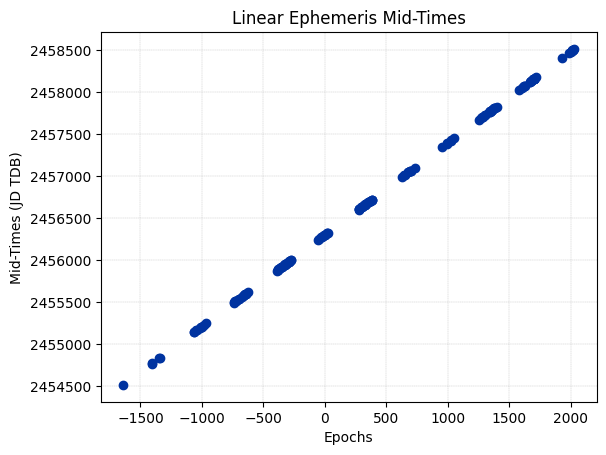

In [16]:
# Now we can plot this ephemeris
ephemeris_obj1.plot_ephemeris(linear_ephemeris, save_plot=False)
plt.show()

🔹 For the Quadratic Ephemeris

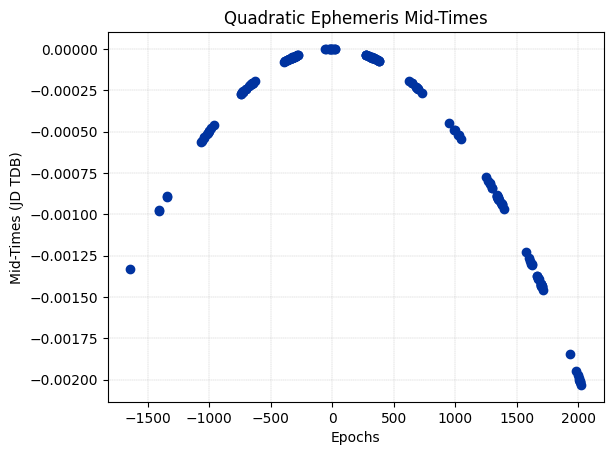

In [17]:
# Now we can plot this ephemeris
ephemeris_obj1.plot_ephemeris(quadratic_ephemeris, subtract_lin_params=True)
plt.show()

🔹 For the precession ephemeris

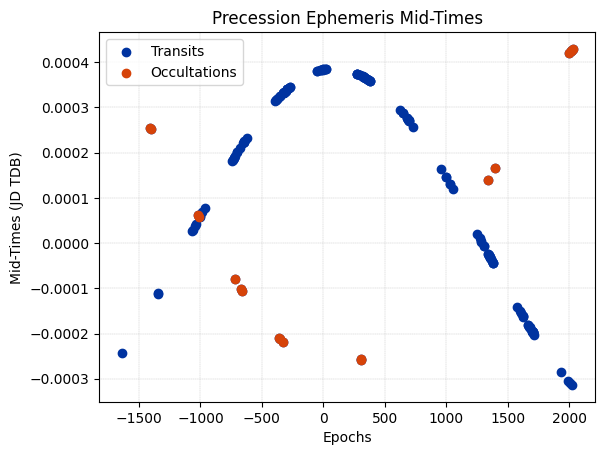

In [18]:
# Now we can plot this ephemeris
ephemeris_obj1.plot_ephemeris(precession_ephemeris, subtract_lin_params=True, show_occultations=True)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the ephemeris uncertainties

🔹 For the Linear Ephemeris

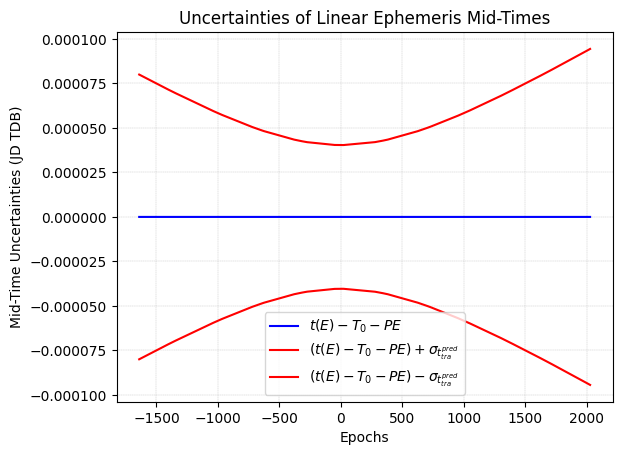

In [19]:
ephemeris_obj1.plot_timing_uncertainties(linear_ephemeris, save_plot=False)
plt.show()

🔹 For the Quadratic Ephemeris

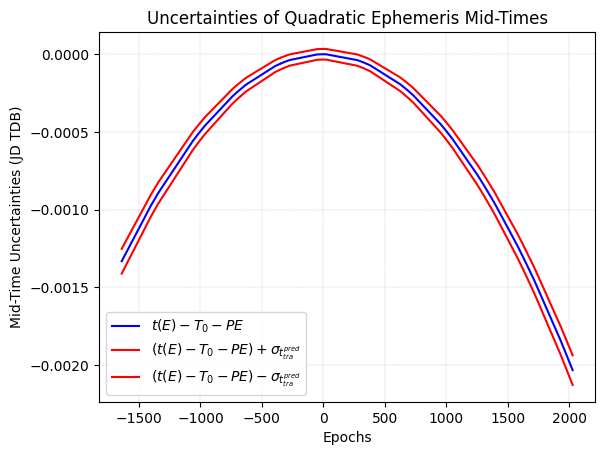

In [20]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_ephemeris, save_plot=False)
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The O-C Plot

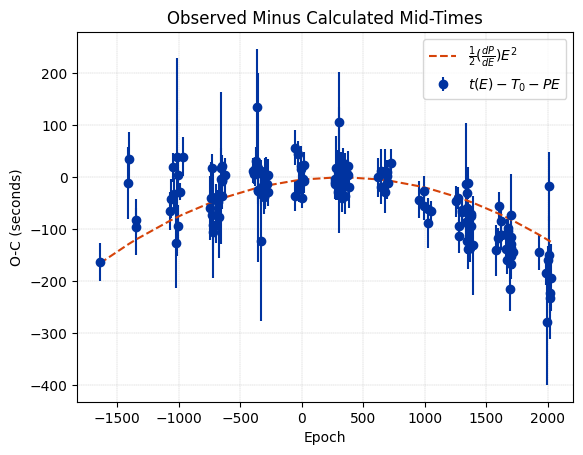

In [21]:
ephemeris_obj1.plot_oc_plot("quadratic")
plt.show()

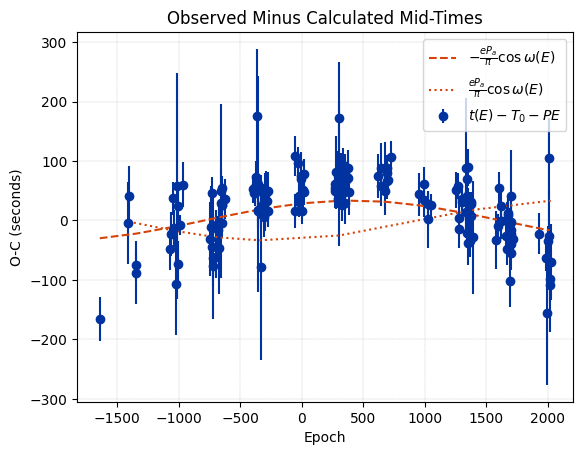

In [22]:
ephemeris_obj1.plot_oc_plot("precession")
plt.show()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the running $\Delta$ BIC

c:\Users\bigna\Desktop\VIP_nathan_2025\venv\Lib\site-packages\susie\ephemeris.py:99: RuntimeWarning: invalid value encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan
c:\Users\bigna\Desktop\VIP_nathan_2025\venv\Lib\site-packages\susie\ephemeris.py:233: RuntimeWarning: invalid value encountered in divide
  period_tra = np.divide(mid_time_diff_tra, epochs_diff_tra)[-1] if x[tra_mask].size > 0 else np.nan


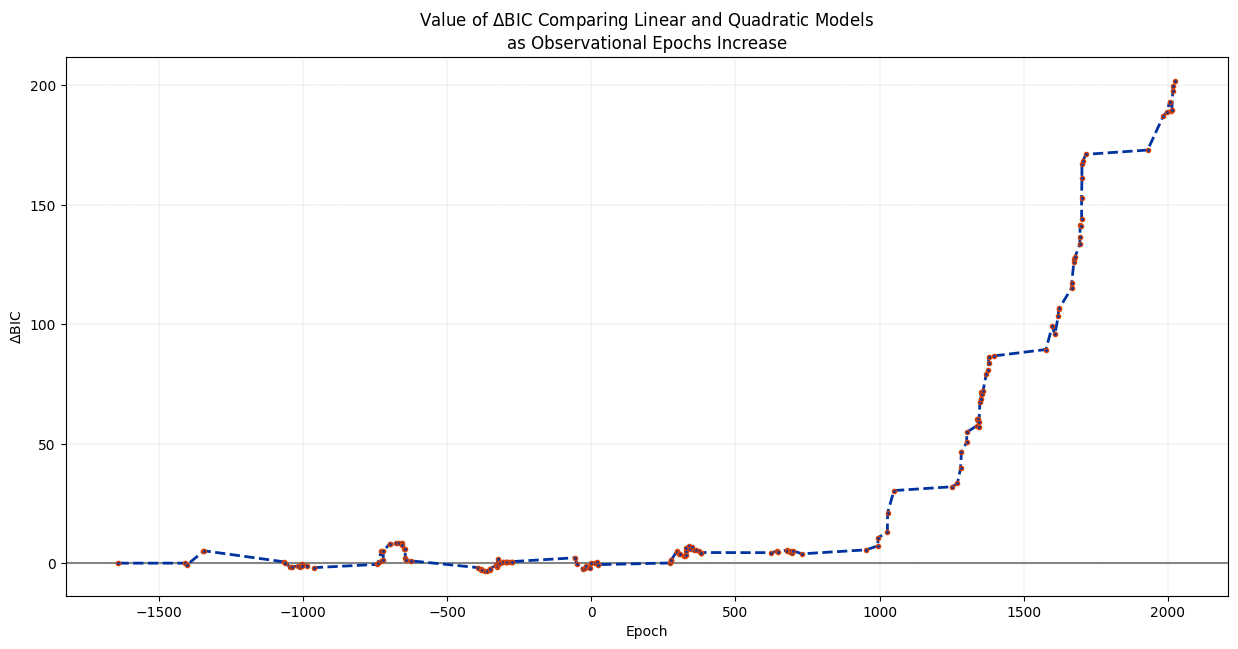

In [23]:
ephemeris_obj1.plot_running_delta_bic("linear", "quadratic")
plt.show()

In [24]:
ephemeris_obj1.plot_running_analytical_delta_bic_quadratic()

AttributeError: module 'numpy' has no attribute 'pow'

<hr style="color: #D64309;">
<hr style="color: #D64309;">